In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [2]:
data=pd.read_csv(r"C:\Users\manir\Downloads\Data science class\Unsupervised\Mall_Customers_withNulls.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      199 non-null    float64
 4   Spending Score (1-100)  199 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
data.dropna(axis=0, inplace=True)

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# drop customerId column

data.drop('CustomerID', axis=1, inplace=True)

### EDA -Exploratory data analysis

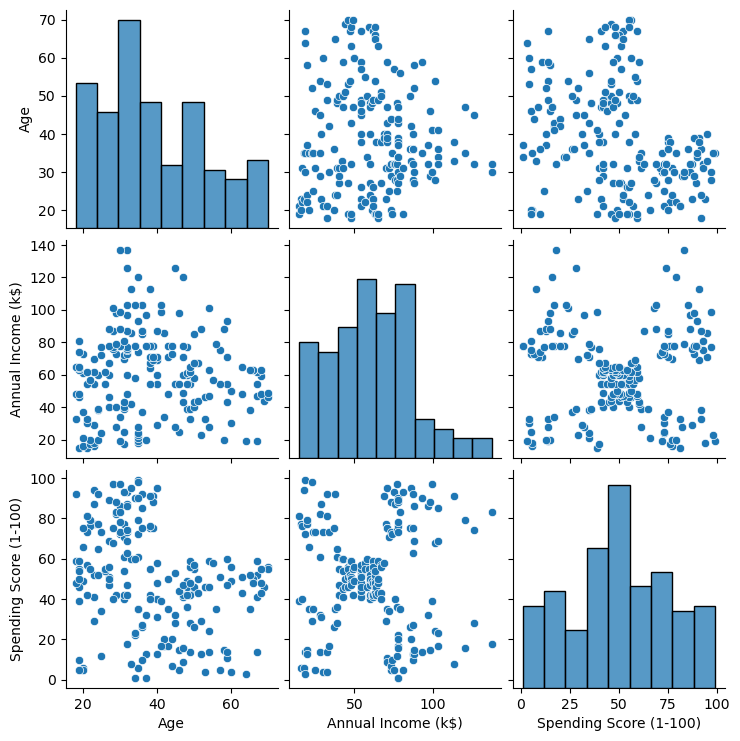

In [8]:
sns.pairplot(data)

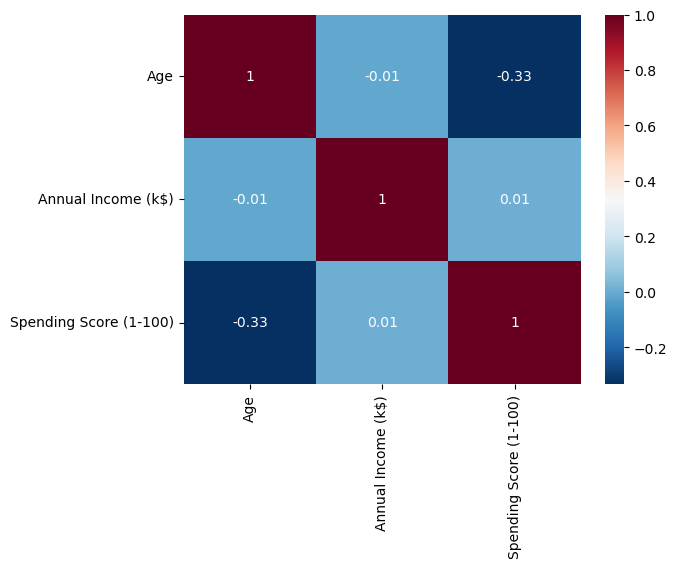

In [11]:
sns.heatmap(data.corr(), annot=True, cmap="RdBu_r");
plt.show()

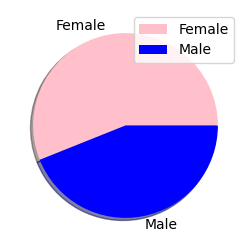

In [16]:
plt.figure(figsize=(3,3))
size=data['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
plt.pie(size,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

From above pie diagram come to know more women are going to mall than men

In [15]:
# changing the column name

data.rename(columns={'Annual Income (k$)':'Annual_Income' ,'Spending Score (1-100)':'Spending_Score'}, inplace=True)

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


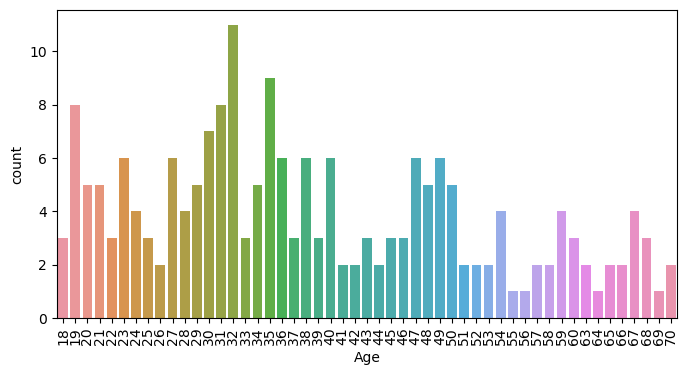

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data['Age'])
plt.xticks(rotation=90)
plt.show()

Peoples of age between 25 to 40 are mostly visiting mall than other age groups

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


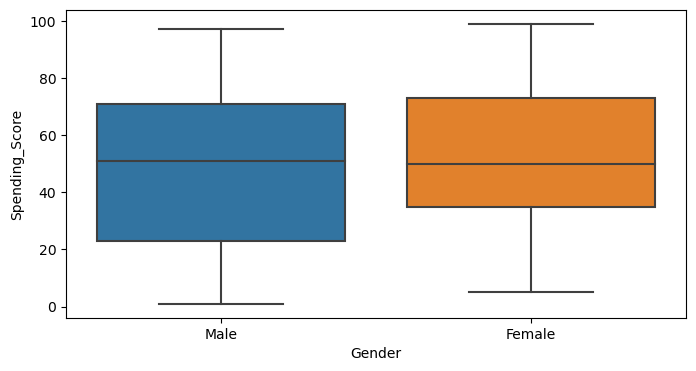

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(data['Gender'], data['Spending_Score'])
plt.show()

This diagram shows the mean spendscore of female and male. we can observe that the mean average spend score of female is greater than male, they have higher spendscore than male,and their least spendscore is greater than males least spendscore

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


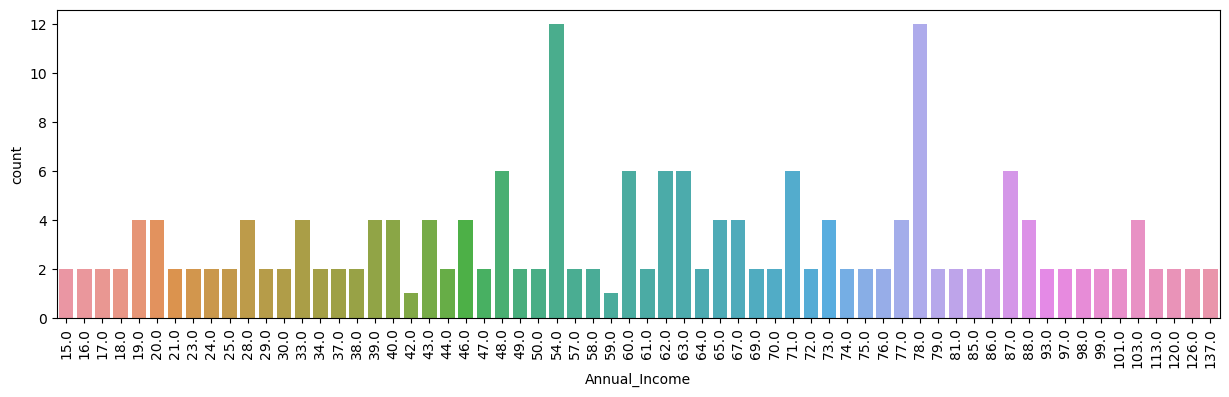

In [26]:
plt.figure(figsize=(15,4))
sns.countplot(data['Annual_Income'])
plt.xticks(rotation=90)
plt.show()

C:\Users\manir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


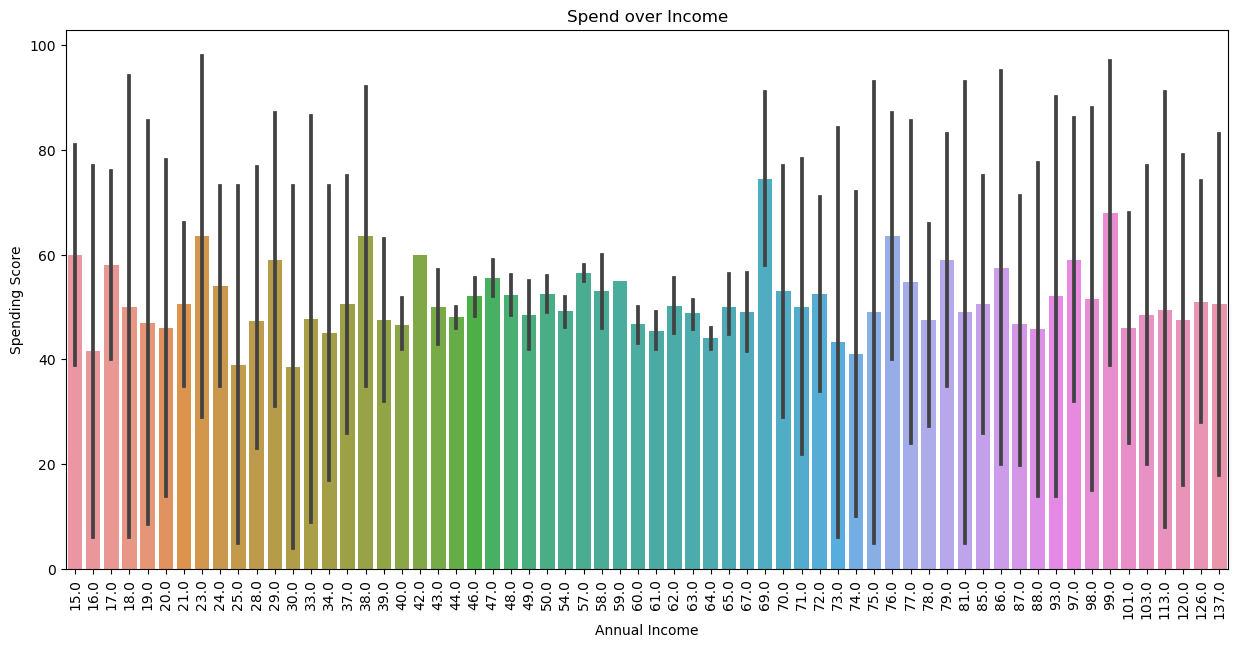

In [35]:
plt.figure(figsize=(15,7))
sns.barplot(data['Annual_Income'],data['Spending_Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Spend over Income')
plt.xticks(rotation=90)
plt.show()

### Data cleaning

In [37]:
#Handling the categorical value

le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [52]:
# applying the normalization on dataframe
# cols=data.columns

# norm=MinMaxScaler()
# df=norm.fit_transform(data)

# df1=pd.DataFrame(df, columns=[cols])
# df1.head()
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15.0,39.0
1,1,21,15.0,81.0
2,0,20,16.0,6.0
3,0,23,16.0,77.0
4,0,31,17.0,40.0


### Model Fitting

In [59]:
cluster=DBSCAN(eps=3, min_samples=3, metric='euclidean')

cluster.fit(data)

DBSCAN(eps=3, min_samples=3)

In [60]:
cluster.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1,  2,  2,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [61]:
clus=pd.DataFrame(cluster.labels_)
data['cluster']=clus

In [62]:
data.head()

,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,19,15.0,39.0,-1.0
1,1,21,15.0,81.0,-1.0
2,0,20,16.0,6.0,-1.0
3,0,23,16.0,77.0,-1.0
4,0,31,17.0,40.0,-1.0
